# Data Story

### Import librarys and cleaned dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/diabetic_data_clean.csv', header=0)
df.shape

(69973, 43)

## Q1. What are the relationships between numerical variables and readmission?

### Approach: Create scratterlots of numerical variables and label readmission categories to check whether there are correlation trends between them. Create boxplot of numerical variables seperated by readmission categories to see the distrubution of the data between two readmission categories.

- Scatterplot of variables `num_procedures`, `number_diagnoses`, `num_medications`,`num_lab_procedures`. Those four numerical variables are about how many procedures/diagnoses/medications have been given and they are in similar scales.

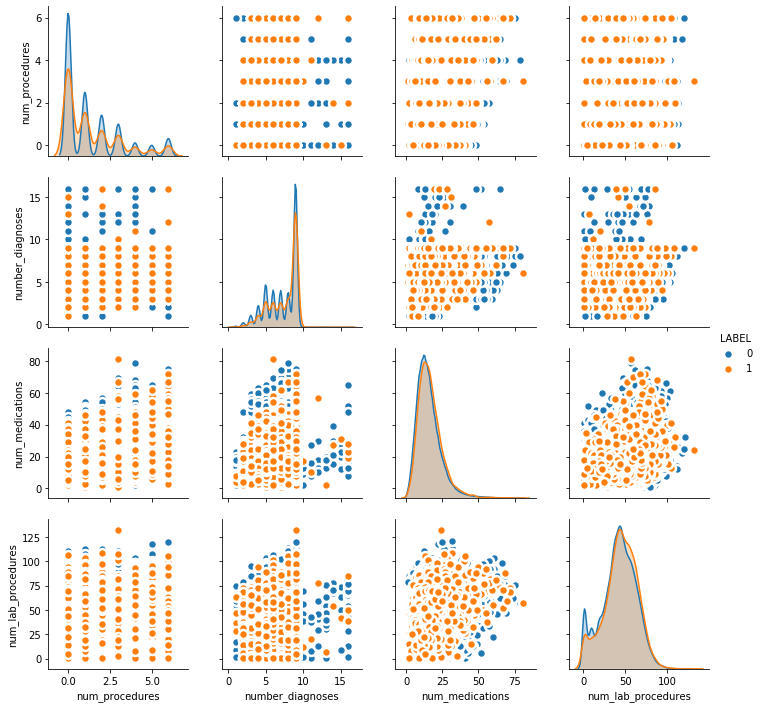

In [3]:
sns.pairplot(df, vars = ['num_procedures', 'number_diagnoses', 'num_medications','num_lab_procedures'],
             kind="scatter", hue="LABEL",  plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

- Scatterplot of variables `number_outpatient`, `number_inpatient`, `number_emergency`, `num_lab_procedures`. Those three numerical variables are about different type of clinic/hospital visits in the year precdeing the encounter and they are in similar scales.

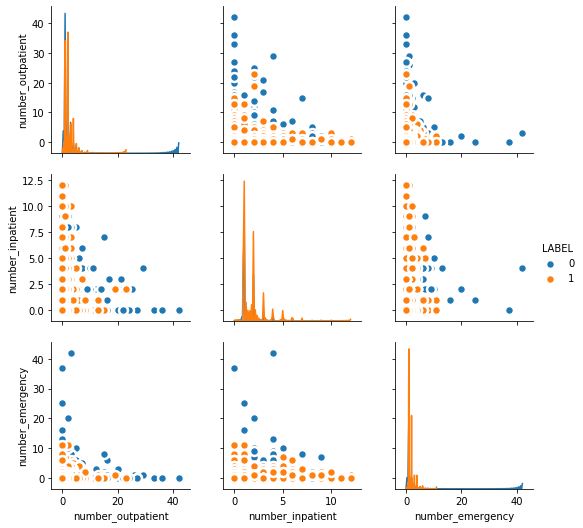

In [4]:
sns.pairplot(df, vars = ['number_outpatient', 'number_inpatient','number_emergency'],
             kind="scatter", hue="LABEL",  plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

- Boxplot of numerical variables by readmission catetories (0, 1).

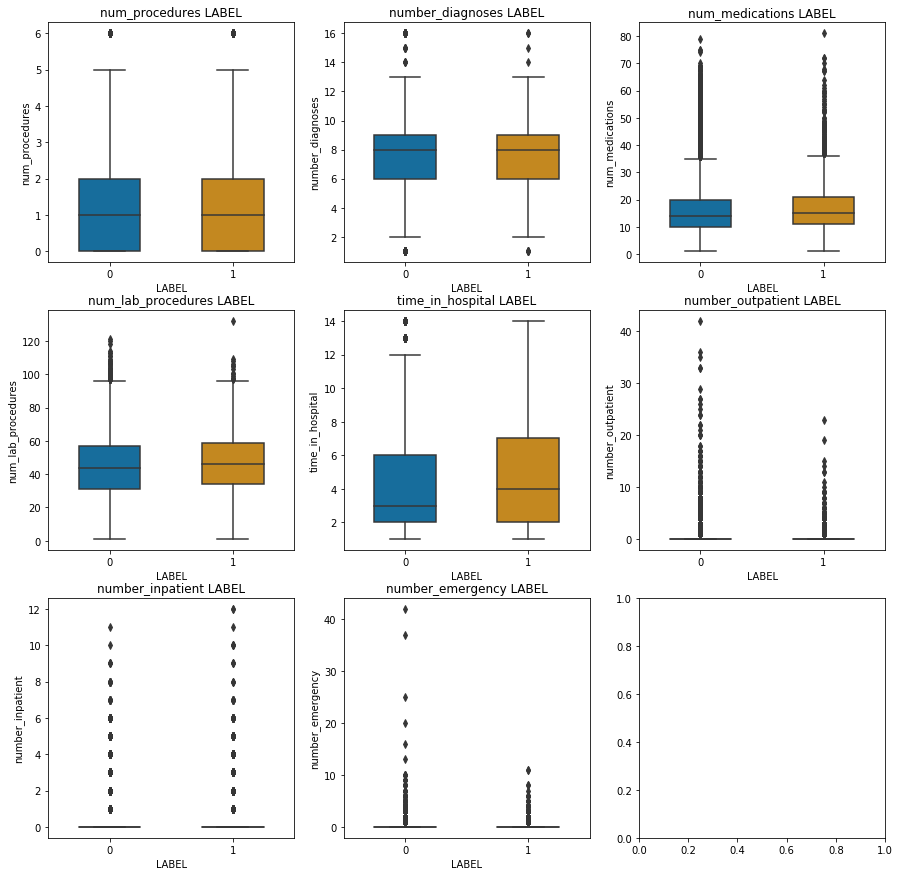

In [5]:
def bplot_label(df, col, ax=None):
    bplot = sns.boxplot(y=col, x='LABEL', 
                        data=df, width=0.5, 
                        palette="colorblind", ax=ax)
    bplot.set_title(col + ' LABEL')
    
fig, axes = plt.subplots(3,3,figsize=(15,15))
bplot_label(df, 'num_procedures', ax=axes[0,0])
bplot_label(df, 'number_diagnoses', ax=axes[0,1])
bplot_label(df, 'num_medications', ax=axes[0,2])
bplot_label(df, 'num_lab_procedures', ax=axes[1,0])
bplot_label(df, 'time_in_hospital', ax=axes[1,1])
bplot_label(df, 'number_outpatient', ax=axes[1,2])
bplot_label(df, 'number_inpatient', ax=axes[2,0])
bplot_label(df, 'number_emergency', ax=axes[2,1])

### Results and conclusions
- Low posistive correlations are present between `num_medications` and `num_lab_procedures`, `num_medications` and `number_diagnoses`
- No linear relationships between different type of hospital/clinic visits preceding the encounters.
- Readmission has relationships with those numerical variables: 
    * Readmissions tend to be associated with *low* `number_emergency` and `number_outpatient`.
    * The longer time stay (between 1 day and 14 days) in hospital, the more chance to have readmission.

## Q2. What are the relationships between categorical variables and readmissions?

### Approach: Create barplots of those categorical variables by readmission categories. And create barplots of proportion of readmission by different values of a categorical variable.

In [6]:
def cat_barplot(data, var, txt, fgsz):

    fig, axes = plt.subplots(1, 2, figsize=fgsz)

    sns.countplot(x = data[var].sort_values(), hue = data['LABEL'], ax=axes[0])
    axes[0].set_title(txt + ' VS. Readmission')

    tbl = pd.pivot_table(data, values='encounter_id', index=[var], columns='LABEL', aggfunc='count', margins=False)
    props = tbl.iloc[:,1]/tbl.apply(sum, axis=1)
    splot = sns.barplot(props.index, props.values, ax=axes[1])
    axes[1].set_title(txt +' VS. Proportion of Readmission')
    axes[1].set_ylabel('Proportion')
    
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')

    fig.suptitle(txt, y=1.03, fontsize=16)

    plt.tight_layout()
    plt.show()

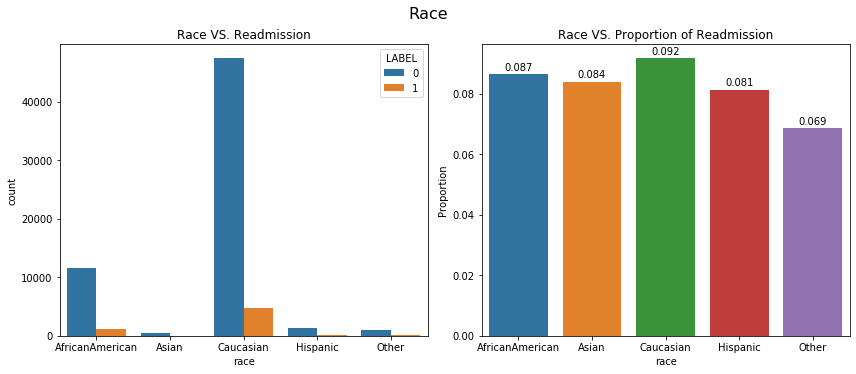

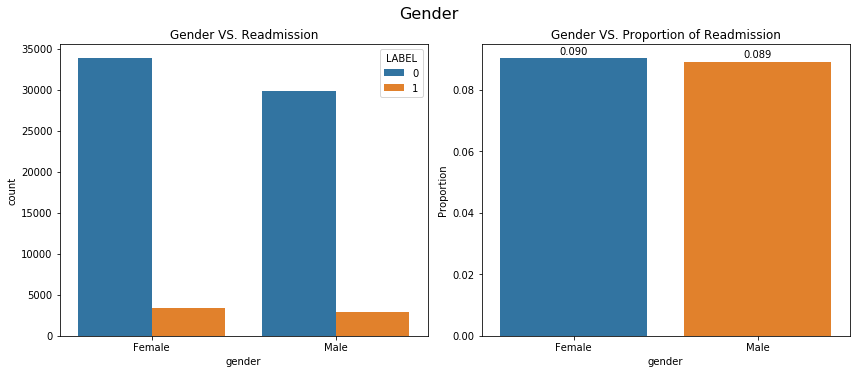

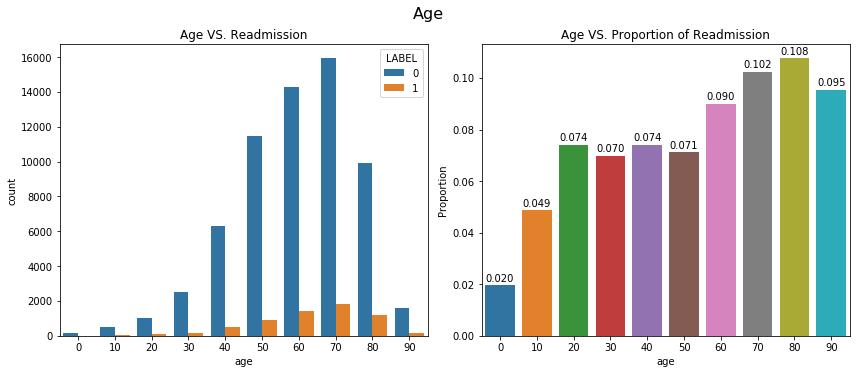

In [7]:
# Demographic variables
cat_barplot(data=df, var='race', txt='Race', fgsz=(12, 5))
cat_barplot(data=df, var='gender', txt='Gender', fgsz=(12, 5))
cat_barplot(data=df, var='age', txt='Age', fgsz=(12, 5))

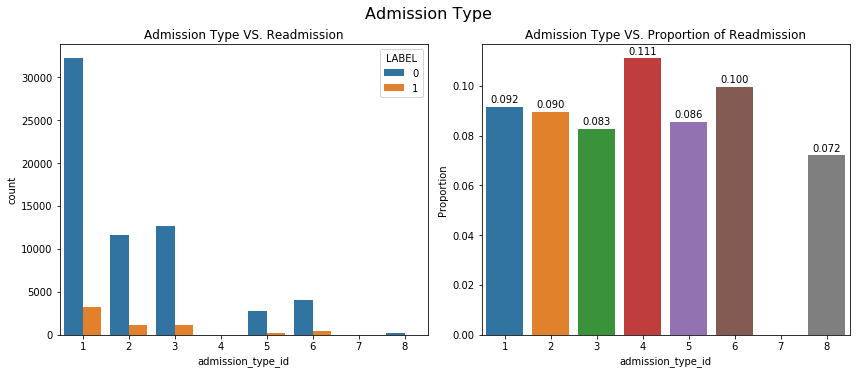

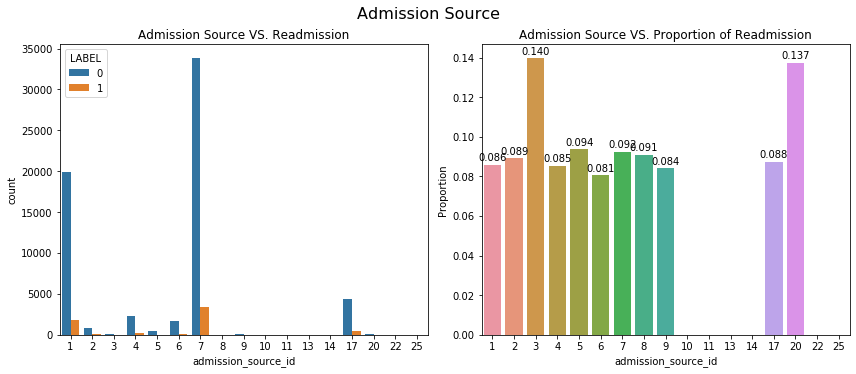

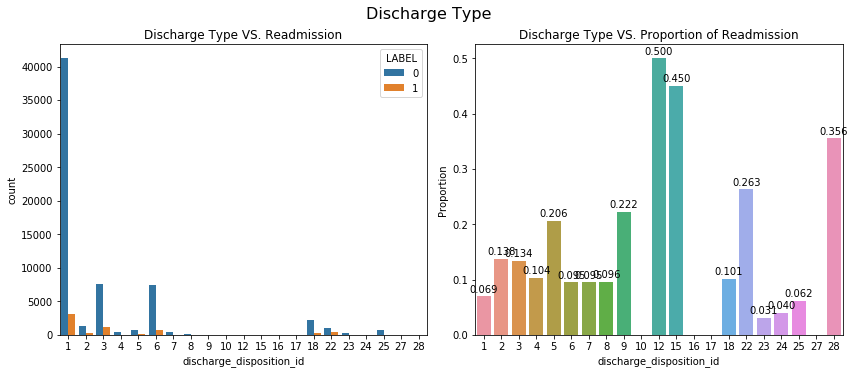

In [8]:
# admission and discharge types
cat_barplot(data=df, var='admission_type_id', txt='Admission Type', fgsz=(12, 5))
cat_barplot(data=df, var='admission_source_id', txt='Admission Source', fgsz=(12, 5))
cat_barplot(data=df, var='discharge_disposition_id', txt='Discharge Type', fgsz=(12, 5))

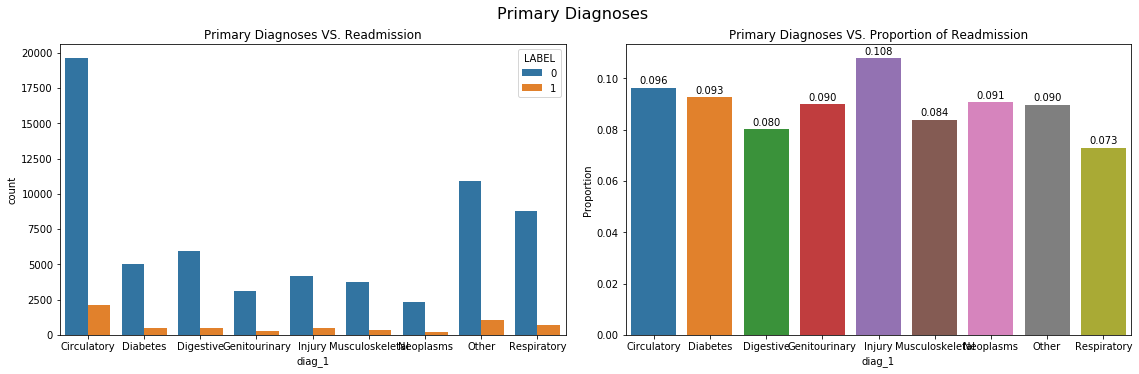

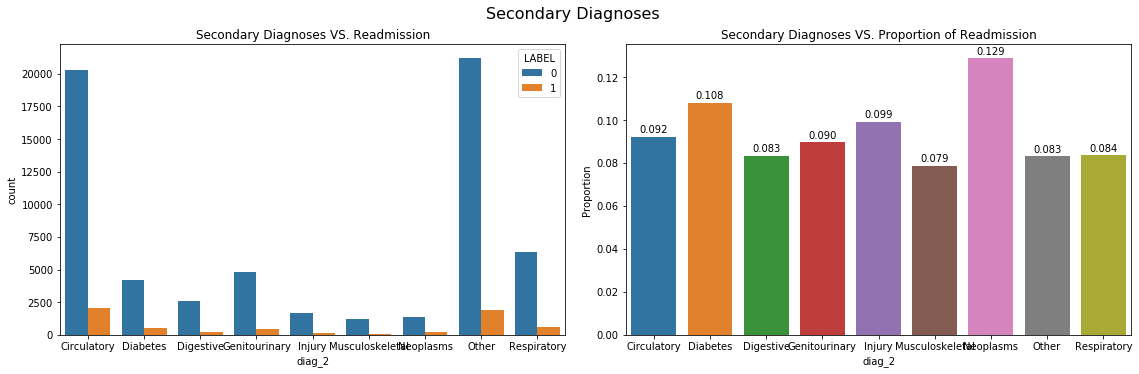

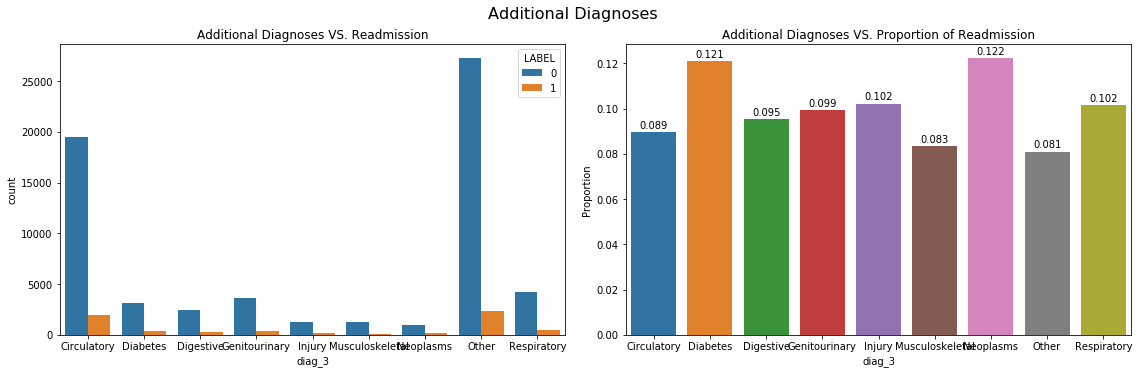

In [9]:
# Primary (diag_1), Secondary (diag_2) and Additional (diag_3) diagnoses.
cat_barplot(data=df, var='diag_1', txt='Primary Diagnoses', fgsz=(16, 5))
cat_barplot(data=df, var='diag_2', txt='Secondary Diagnoses', fgsz=(16, 5))
cat_barplot(data=df, var='diag_3', txt='Additional Diagnoses', fgsz=(16, 5))

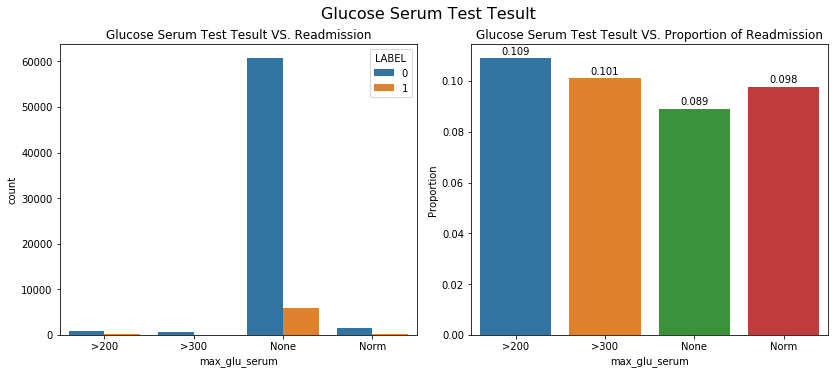

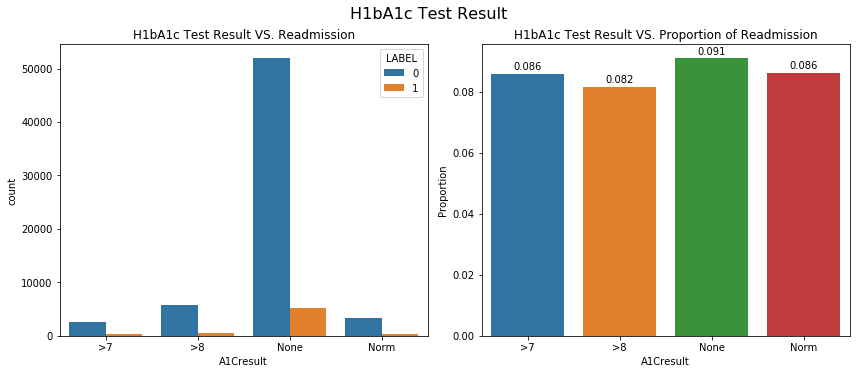

In [10]:
# lab test results
cat_barplot(data=df, var='max_glu_serum', txt='Glucose Serum Test Tesult', fgsz=(12, 5))
cat_barplot(data=df, var='A1Cresult', txt='H1bA1c Test Result', fgsz=(12, 5))

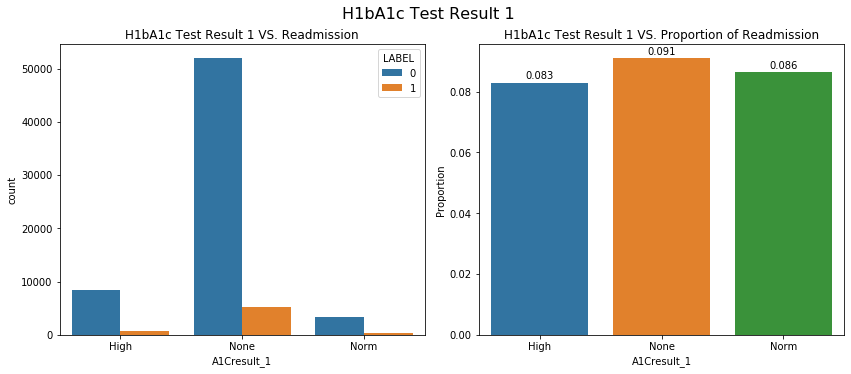

In [11]:
# A1Cresult_1
df = df.assign(A1Cresult_1 = [A1Cresult if A1Cresult in ['Norm','None'] else 'High' for A1Cresult in df['A1Cresult']]) 
cat_barplot(data=df, var='A1Cresult_1', txt='H1bA1c Test Result 1', fgsz=(12, 5))

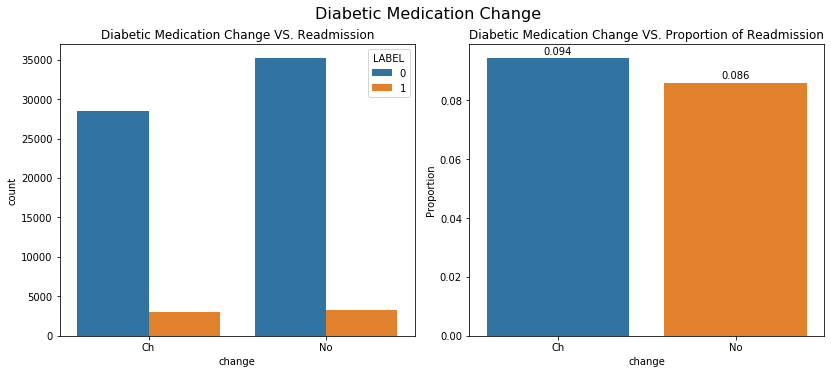

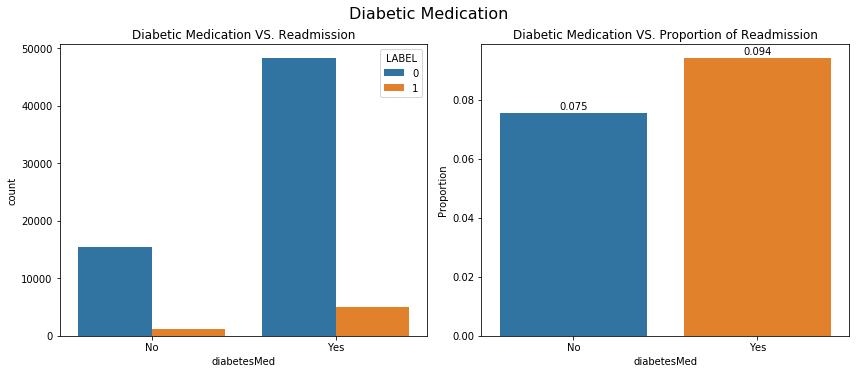

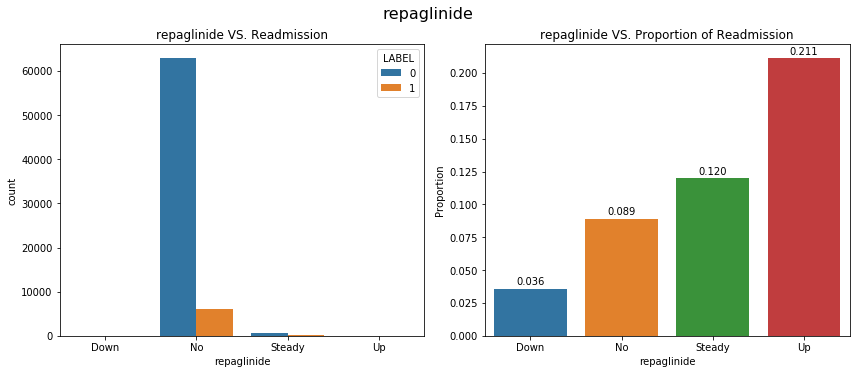

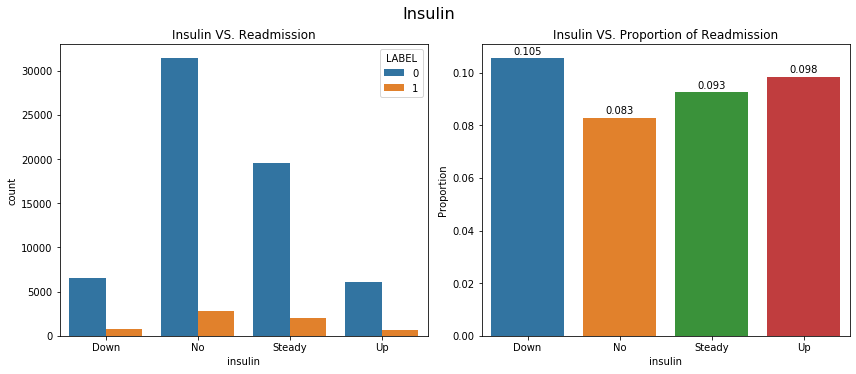

In [12]:
# Diabetic medications
cat_barplot(data=df, var='change', txt='Diabetic Medication Change', fgsz=(12, 5))
cat_barplot(data=df, var='diabetesMed', txt='Diabetic Medication', fgsz=(12, 5))
cat_barplot(data=df, var='repaglinide', txt='repaglinide', fgsz=(12, 5))
cat_barplot(data=df, var='insulin', txt='Insulin', fgsz=(12, 5))

In [13]:
med_col = df.iloc[:,20:40].apply(pd.value_counts).T
med_col

,Down,No,Steady,Up
metformin,435.0,55070.0,13634.0,834.0
repaglinide,28.0,69056.0,818.0,71.0
nateglinide,8.0,69482.0,467.0,16.0
chlorpropamide,1.0,69902.0,66.0,4.0
glimepiride,136.0,66276.0,3331.0,230.0
acetohexamide,NaN,69972.0,1.0,NaN
glipizide,371.0,60966.0,8063.0,573.0
glyburide,418.0,62198.0,6744.0,613.0
tolbutamide,NaN,69956.0,17.0,NaN
pioglitazone,81.0,64710.0,5004.0,178.0


20 diabetic medications. The values are: “**Up**” if the dosage was increased during the encounter, “**Down**” if the dosage was decreased, “**Steady**” if the dosage did not change, and “**No**” if the drug was not prescribed. Variables `change` and `diabetesMed` has summary information about those 20 diabetic medication. `change` indicates if there was a change in diabetic medications (either dosage or generic name). `diabetesMed` indicates if there was any diabetic medication prescribed. For a encounter, if all 20 diabetic medications have **No** as values, then `diabetesMed`  is **No** and `change` is **No** too.

In [14]:
tbl_2way = pd.pivot_table(df, values='encounter_id', index=['A1Cresult_1', 'change'], columns='LABEL', aggfunc='count', margins=True)
tbl_2way

LABEL                   0     1    All
A1Cresult_1 change                    
High        Ch       5000   473   5473
            No       3349   282   3631
None        Ch      22051  2359  24410
            No      29878  2840  32718
Norm        Ch       1469   139   1608
            No       1949   184   2133
All                 63696  6277  69973

In [ ]:
r1 = tbl_2way.iloc[3,2]/tbl_2way.iloc[8,2]
r2 = tbl_2way.iloc[3,1]/tbl_2way.iloc[3,2]
print('The total encounters are {}.'.format(tbl_2way.iloc[8,2]))
print('The total encounters of High A1C result and No change of medication are {}.'.format(tbl_2way.iloc[3,2]))
print('The total encounters of High A1C result and No change of medication and having readmission are {}.'.format(tbl_2way.iloc[3,1]))

print('\nThe percentage of High A1C result and No change of medication and having readmission is {:.2%}.'.format(r1))
print('The percentage of High A1C result and No change of medication and having readmission and having readmission is {:.2%}.'.format(r2))

### Results and conclusions
- From bar plots, it is hard to tell readmission is associated with which categorical variables.
- From two-way contingency table, readmission is **overrepresented** in group (High A1C result and No change of medication) when comparing encounter percentage of 7.29% to 3.11%. But this conclusion needs to be proved in a statistical test.
- If the test of association is significant, then High A1C result but without change of medication tends to have high chance of readmission.